In [1]:
%%time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score,roc_curve, plot_confusion_matrix, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Wall time: 885 ms


In [2]:
df= pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [5]:
df['Gender'].replace({'Female':0,'Male':1},inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [7]:
df.drop('User ID',axis=1,inplace=True)

In [9]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


<AxesSubplot:>

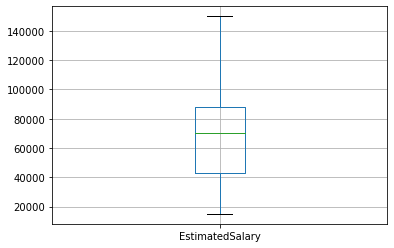

In [11]:
df[['EstimatedSalary']].boxplot()

In [17]:
x = df.drop('Purchased',axis=1)
y = df['Purchased']

In [18]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [20]:
x_train

,Gender,Age,EstimatedSalary
39,0,27,31000
167,0,35,71000
383,1,49,28000
221,1,35,91000
351,1,37,75000
...,...,...,...
255,0,52,90000
72,0,20,23000
396,1,51,23000
235,1,46,79000


In [21]:
rf_clf=RandomForestClassifier(random_state=10)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=10)

In [22]:
test_score= rf_clf.score(x_test,y_test)
train_score=rf_clf.score(x_train,y_train)
print('test score is ',test_score,'train score is ',train_score)

test score is  0.85 train score is  0.9964285714285714


## Hyper paramter tuning

## using GSCV

In [ ]:
params = {'n_estimators':np.arange(10,500),
         'criterion': ['gini','entropy'],
         'max_depth':np.arange(2,20),
         'min_samples_leaf':np.arange(1,100),
         'min_samples_split':np.arange(2,100),
         'max_features':['auto']}

rf_model=RandomForestClassifier(random_state=10)
rf_hyper_model=GridSearchCV()